<a href="https://colab.research.google.com/github/jperdomos/Procesamiento-digital-de-se-ales/blob/main/Fouriernouniforme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Fourier con muestras no uniformes - Juan Camilo Perdomo Soto

La Transformada Discreta de Fourier (DFT) estándar requiere que las muestras estén igualmente espaciadas, cuando los datos no cumplen esta condición debemos usar alternativas como:

- Interpolación seguida de FFT.
- Periodograma de Lomb-Scargle.
- Transformada de Fourier No Uniforme (NUFT)

## 1. Generación de datos no uniformemente muestreados

Vamos a construir una señal compuesta por dos senoidales: una de 5 Hz y otra de 10 Hz, pero con tiempos muestreados de forma **no uniforme**.


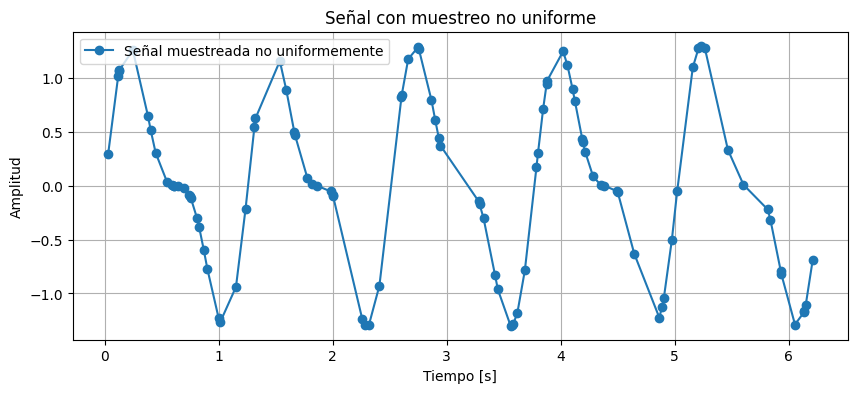

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos no uniformemente muestreados
np.random.seed(0)
N = 100
t_no_uniforme = np.sort(np.random.rand(N) * 2 * np.pi)
x_no_uniforme = np.sin(5 * t_no_uniforme) + 0.5 * np.sin(10 * t_no_uniforme)

# Visualización
plt.figure(figsize=(10, 4))
plt.plot(t_no_uniforme, x_no_uniforme, 'o-', label="Señal muestreada no uniformemente")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal con muestreo no uniforme")
plt.grid(True)
plt.legend()
plt.show()


## 2. Interpolación a una rejilla uniforme

Interpolamos los valores de la señal para obtener una versión de la señal con muestreo uniforme. Usaremos interpolación cúbica.

La interpolación nos permite aplicar la FFT convencional como si los datos hubiesen sido uniformes.


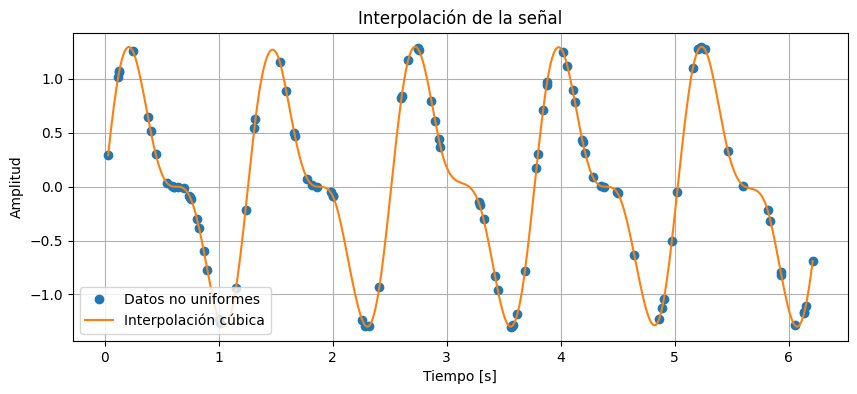

In [2]:
from scipy.interpolate import interp1d

# Crear un conjunto uniforme de tiempos
t_uniforme = np.linspace(t_no_uniforme.min(), t_no_uniforme.max(), 512)

# Interpolación cúbica
interp_func = interp1d(t_no_uniforme, x_no_uniforme, kind='cubic')
x_uniforme = interp_func(t_uniforme)

# Visualización
plt.figure(figsize=(10, 4))
plt.plot(t_no_uniforme, x_no_uniforme, 'o', label='Datos no uniformes')
plt.plot(t_uniforme, x_uniforme, '-', label='Interpolación cúbica')
plt.title('Interpolación de la señal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


## 3. Aplicación de la FFT

Una vez interpolada la señal podemos aplicar la Transformada Rápida de Fourier (FFT) para obtener el espectro de frecuencias.

La fórmula de la FFT aplicada sobre una señal $x[n]$ es:

$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j 2\pi \frac{k n}{N}}, \quad k = 0, 1, \dots, N-1
$


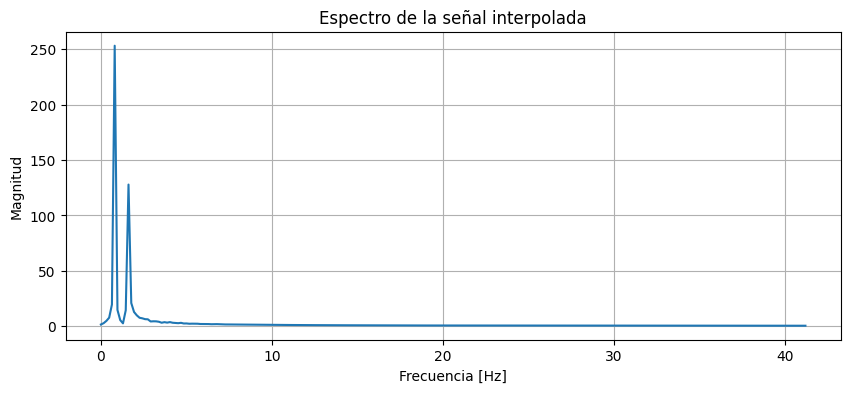

In [3]:
from scipy.fft import fft, fftfreq

# Aplicar la FFT
X = fft(x_uniforme)
f = fftfreq(len(t_uniforme), d=(t_uniforme[1] - t_uniforme[0]))

# Mostrar el espectro (solo parte positiva)
plt.figure(figsize=(10, 4))
plt.plot(f[:len(f)//2], np.abs(X[:len(f)//2]))
plt.title("Espectro de la señal interpolada")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()


## 4. Periodograma de Lomb-Scargle (opcional)

El **Lomb-Scargle Periodogram** es una herramienta diseñada para analizar señales **directamente** con muestreo no uniforme. Calcula la potencia espectral sin necesidad de interpolar.

La fórmula de la potencia espectral está basada en un ajuste senoidal ponderado por mínimos cuadrados.


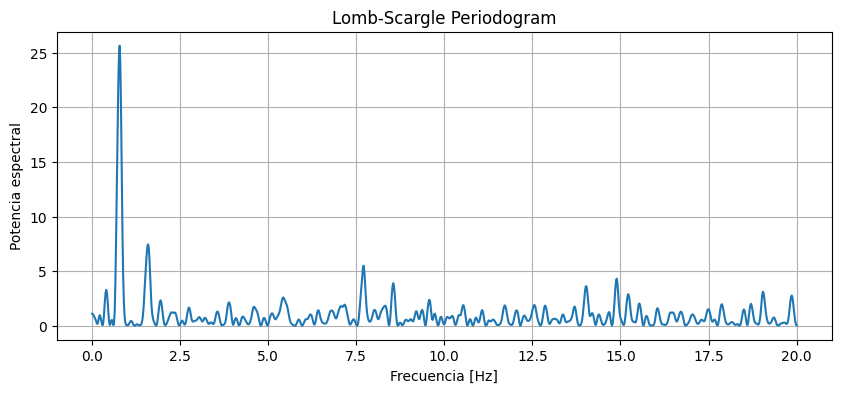

In [4]:
from scipy.signal import lombscargle

# Frecuencias para el análisis
frequencies_lomb = np.linspace(0.01, 20, 1000)
angular_freqs = 2 * np.pi * frequencies_lomb

# Cálculo del espectro
lomb_power = lombscargle(t_no_uniforme, x_no_uniforme, angular_freqs)

# Mostrar espectro
plt.figure(figsize=(10, 4))
plt.plot(frequencies_lomb, lomb_power)
plt.title("Lomb-Scargle Periodogram")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia espectral")
plt.grid(True)
plt.show()
